# Analysis of Funnel and Revenue Data (Synthetic)

### Exploratory Analyses

In [67]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [68]:
session_data = pd.read_csv("data/Funnel-Analysis/user_sessions.csv")

In [191]:
session_data.head(20)

,user_id,session_id,timestamp,event_type,page_name,product_id,device_type,browser,os,geo_country,geo_city,traffic_source,campaign,referrer_url,revenue,date,time,month
0,2946,1184,2025-05-12 19:58:43.641489,view,/product/909,909.0,mobile,Edge,Linux,Germany,Singhtown,facebook,black_friday,https://edwards-jacobs.com/,0.00,2025-05-12,19:58:43.641489,2025-05
1,2946,1184,2025-05-12 19:59:43.641489,scroll,/product/909,909.0,mobile,Edge,Linux,Germany,Singhtown,facebook,black_friday,https://edwards-jacobs.com/,0.00,2025-05-12,19:59:43.641489,2025-05
2,2946,1184,2025-05-12 20:00:43.641489,click,/checkout,909.0,mobile,Edge,Linux,Germany,Singhtown,facebook,black_friday,https://edwards-jacobs.com/,0.00,2025-05-12,20:00:43.641489,2025-05
3,2946,1184,2025-05-12 20:01:43.641489,add_to_cart,/product/909,909.0,mobile,Edge,Linux,Germany,Singhtown,facebook,black_friday,https://edwards-jacobs.com/,0.00,2025-05-12,20:01:43.641489,2025-05
4,2946,1184,2025-05-12 20:02:43.641489,purchase,/checkout,909.0,mobile,Edge,Linux,Germany,Singhtown,facebook,black_friday,https://edwards-jacobs.com/,68.91,2025-05-12,20:02:43.641489,2025-05
5,4728,6963,2025-07-20 01:23:14.446042,click,/product/303,303.0,tablet,Chrome,Windows,USA,South Kristinemouth,email,summer_sale,http://williams-rogers.com/,0.00,2025-07-20,01:23:14.446042,2025-07
6,4728,6963,2025-07-20 01:24:14.446042,view,/home,NaN,tablet,Chrome,Windows,USA,South Kristinemouth,email,summer_sale,http://williams-rogers.com/,0.00,2025-07-20,01:24:14.446042,2025-07
7,4728,6963,2025-07-20 01:25:14.446042,scroll,/search,NaN,tablet,Chrome,Windows,USA,South Kristinemouth,email,summer_sale,http://williams-rogers.com/,0.00,2025-07-20,01:25:14.446042,2025-07
8,4728,6963,2025-07-20 01:26:14.446042,click,/product/303,303.0,tablet,Chrome,Windows,USA,South Kristinemouth,email,summer_sale,http://williams-rogers.com/,0.00,2025-07-20,01:26:14.446042,2025-07
9,3206,5922,2025-10-03 02:36:06.979943,click,/product/303,303.0,desktop,Safari,Linux,Germany,Jessicabury,direct,retargeting,https://www.fisher.biz/,0.00,2025-10-03,02:36:06.979943,2025-10


In [70]:
session_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57156 entries, 0 to 57155
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         57156 non-null  int64  
 1   session_id      57156 non-null  int64  
 2   timestamp       57156 non-null  object 
 3   event_type      57156 non-null  object 
 4   page_name       57156 non-null  object 
 5   product_id      30466 non-null  float64
 6   device_type     57156 non-null  object 
 7   browser         57156 non-null  object 
 8   os              57156 non-null  object 
 9   geo_country     57156 non-null  object 
 10  geo_city        57156 non-null  object 
 11  traffic_source  57156 non-null  object 
 12  campaign        57156 non-null  object 
 13  referrer_url    57156 non-null  object 
 14  revenue         57156 non-null  float64
dtypes: float64(2), int64(2), object(11)
memory usage: 6.5+ MB


In [71]:
#ProductID 26690 missing values; when user scrolled, was on homepage. Otherwise no NA or Null values
session_data.isna().sum()
session_data.isnull().sum()

user_id               0
session_id            0
timestamp             0
event_type            0
page_name             0
product_id        26690
device_type           0
browser               0
os                    0
geo_country           0
geo_city              0
traffic_source        0
campaign              0
referrer_url          0
revenue               0
dtype: int64

In [72]:
# 8029 unique customers
session_data["user_id"].nunique()

8029

In [167]:
# Only 6.40$ mean revenue per purchase - incl. non-conversion. Median revenue is 0$, meaning at least 50% of the visitors do not buy a product.
session_data["revenue"].mean()
session_data["revenue"].median() #0$

np.float64(0.0)

In [74]:
#Mean revenue per purchase for each country, showing no huge differences - Germany in the lead with 7$ Brazil lowest with 5.9$
session_data["revenue"].groupby(session_data["geo_country"]).mean()

geo_country
Brazil     5.934226
Germany    7.009858
India      6.311824
UK         6.742811
USA        6.041726
Name: revenue, dtype: float64

In [75]:
###### Preparing time data to use in analyses

from datetime import datetime

session_data['timestamp'] = pd.to_datetime(session_data['timestamp'])

# Datum und Zeit in separate Spalten
session_data['date'] = session_data['timestamp'].dt.date
session_data['time'] = session_data['timestamp'].dt.time

session_data.head()

,user_id,session_id,timestamp,event_type,page_name,product_id,device_type,browser,os,geo_country,geo_city,traffic_source,campaign,referrer_url,revenue,date,time
0,2946,1184,2025-05-12 19:58:43.641489,view,/product/909,909.0,mobile,Edge,Linux,Germany,Singhtown,facebook,black_friday,https://edwards-jacobs.com/,0.00,2025-05-12,19:58:43.641489
1,2946,1184,2025-05-12 19:59:43.641489,scroll,/product/909,909.0,mobile,Edge,Linux,Germany,Singhtown,facebook,black_friday,https://edwards-jacobs.com/,0.00,2025-05-12,19:59:43.641489
2,2946,1184,2025-05-12 20:00:43.641489,click,/checkout,909.0,mobile,Edge,Linux,Germany,Singhtown,facebook,black_friday,https://edwards-jacobs.com/,0.00,2025-05-12,20:00:43.641489
3,2946,1184,2025-05-12 20:01:43.641489,add_to_cart,/product/909,909.0,mobile,Edge,Linux,Germany,Singhtown,facebook,black_friday,https://edwards-jacobs.com/,0.00,2025-05-12,20:01:43.641489
4,2946,1184,2025-05-12 20:02:43.641489,purchase,/checkout,909.0,mobile,Edge,Linux,Germany,Singhtown,facebook,black_friday,https://edwards-jacobs.com/,68.91,2025-05-12,20:02:43.641489


#### Exploratory Visualizations

In [76]:
import seaborn as sns

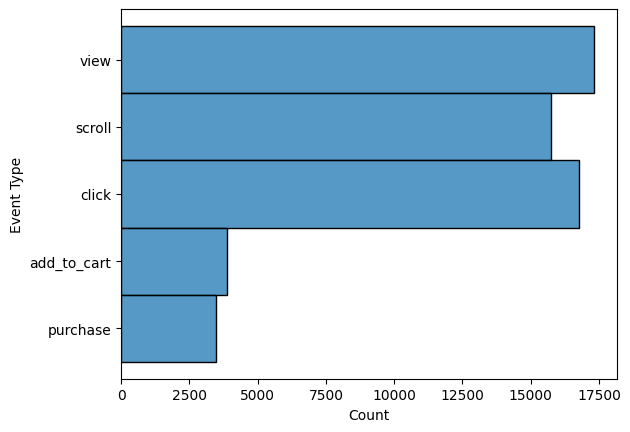

In [77]:
###### Bar-Chart of the frequency of website events to gauge the differences in the funnel steps. Note that "views" relates not only to product views but also to viewing other parts of the website.

sns.histplot(data=session_data, y ="event_type")
plt.ylabel("Event Type")
plt.show()

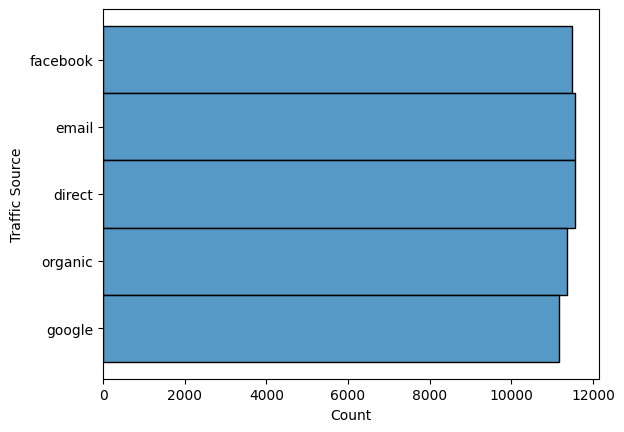

In [80]:
###### Bar-Chart of the distribution of different traffic sources, that brought visitors to the website. Visibly no strong difference between the sources

sns.histplot(data=session_data, y="traffic_source")
plt.ylabel("Traffic Source")
plt.show()

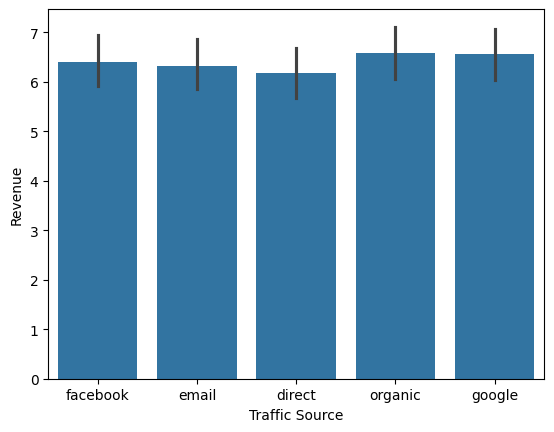

traffic_source
direct      71330.04
email       73042.48
facebook    73578.21
google      73245.21
organic     74859.59
Name: revenue, dtype: float64


In [86]:
###### Bar-Chart of the revenue generated divided by the traffic source that brought the visitor. Again, no strong difference between the sources.

sns.barplot(data=session_data, x="traffic_source", y="revenue")
plt.ylabel("Revenue")
plt.xlabel("Traffic Source")
plt.show()

print(session_data["revenue"].groupby(session_data["traffic_source"]).sum())
#alles ziemlich gleich verteilt zwischen den traffic sources

campaign
black_friday      90358.70
new_user_offer    86749.83
retargeting       93004.66
summer_sale       95942.34
Name: revenue, dtype: float64


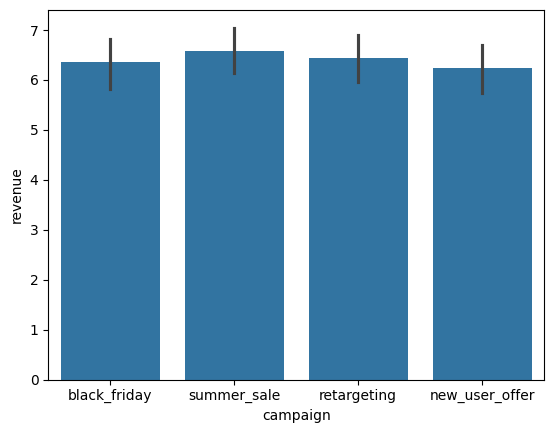

In [85]:
###### Bar-Chart of revenue generated through different campaigns. Slightly higher revenue through the "summer sale" campaign, least through "new user offer".

sns.barplot(data=session_data, x="campaign", y="revenue") #gibt sich nichts

print(session_data["revenue"].groupby(session_data["campaign"]).sum())

# Time series Analysis

These visualizations show the total revenue over the course of the last year (only based on successful sales), as well as a typical day over 24hrs.  For improved interpretation, the moving average was computed for both.

As visible in the first graph, there are no seasonal patterns over the last year. The revenue is generally characterized by extreme fluctuations. The slight increase in revenue around November/December of 2024 does not reflect an expected increase in sales in relation to Black Friday (especially keeping in mind the campaign) or Christmas.

The second graphs shows the daily revenue pattern. A visible drop appears between 2PM and 4PM. Keeping in mind the dimensions of the graph, however, this drop "only" represents an 8 USD decrease from the average. Over the course of a month, avoiding this drop would equal 240 USD in revenue - which still exceeds the customer lifetime value of 128 USD and should be a focus when thinking about ways to increase the sales. Possible reasons: reduced overall traffic, increased drop-offs around this time.

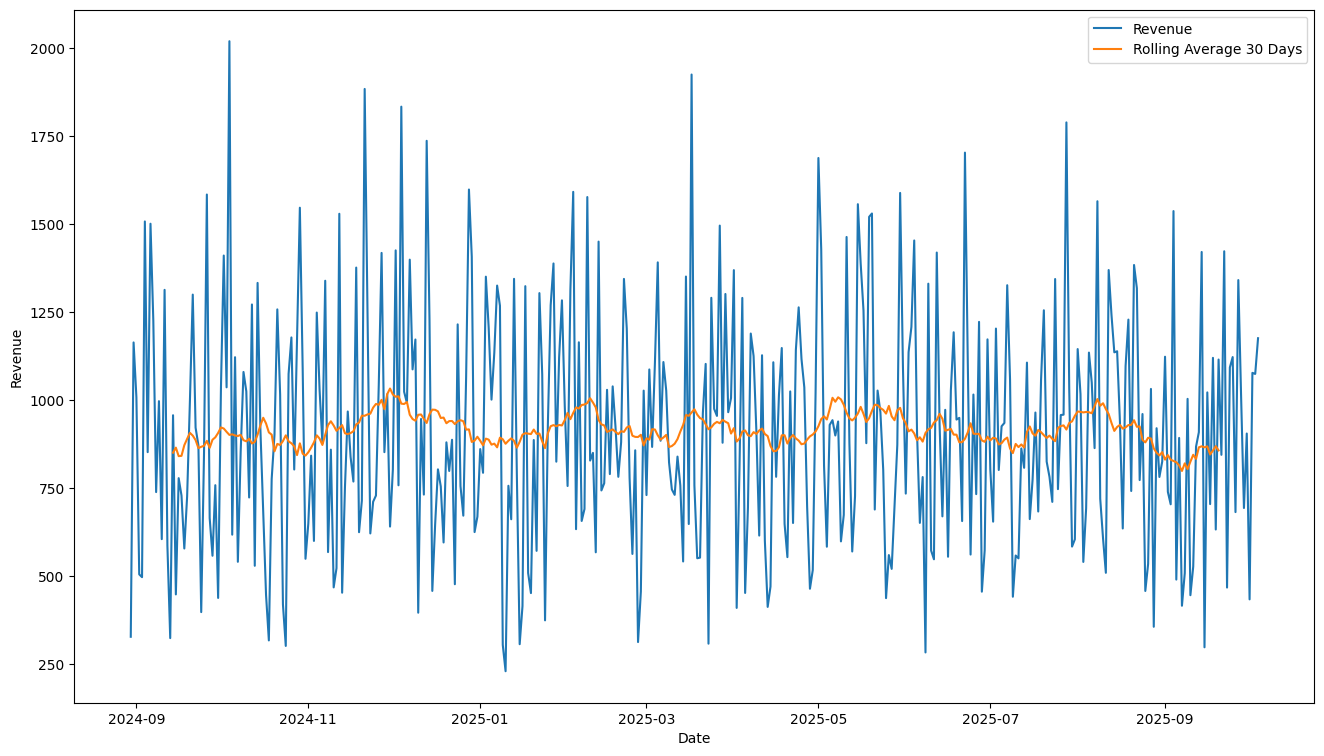

In [129]:
##### Revenue over the Year

purchases_mask = session_data["event_type"] == "purchase"
purchases = session_data[purchases_mask]


daily_revenue = purchases.groupby("date")["revenue"].sum().reset_index()
daily_revenue = daily_revenue.sort_values("date")

#rolling average
daily_revenue["mean_30_days"] = daily_revenue["revenue"].rolling(30, center=True).mean()

#plot rolling avg. over exact curve
plt.figure(figsize=(16,9))
sns.lineplot(data=daily_revenue, x="date", y="revenue", errorbar=None, label="Revenue")
sns.lineplot(data=daily_revenue, x="date", y="mean_30_days", errorbar=None, label="Rolling Average 30 Days")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()

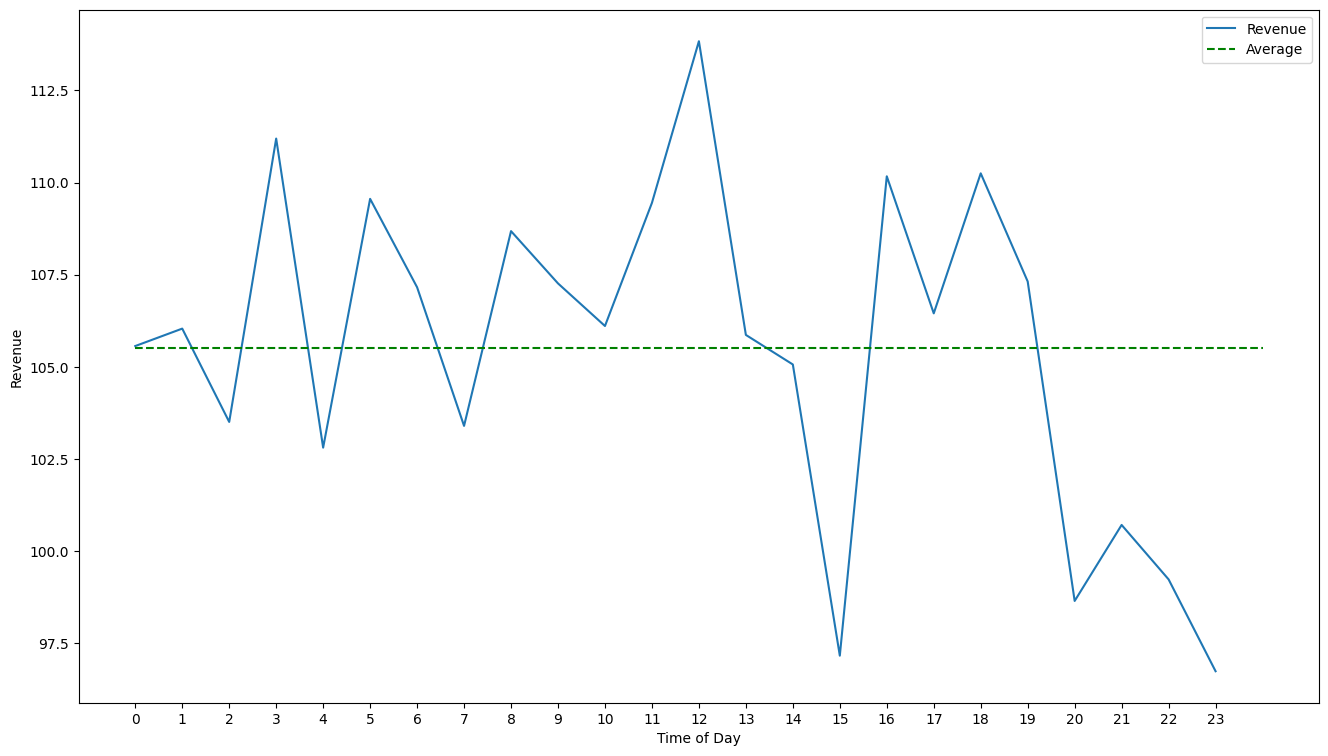

In [178]:
##### Revenue over the Day

hourly_purchases = purchases.sort_values(by = ["timestamp"]).set_index("timestamp")

#Rolling Average
hourly_purchases["hour"] = hourly_purchases["time"].apply(lambda x: x.hour)
hourly_purchases["rolling_mean_hourly"] = hourly_purchases["revenue"].rolling(window='1h', center=True).mean()


plt.figure(figsize=(16,9))
sns.lineplot(data=hourly_purchases, x="hour", y="rolling_mean_hourly", errorbar=None, label="Revenue")
plt.xlabel("Time of Day")
plt.ylabel("Revenue")
plt.xticks(range(24))
plt.hlines(y = 105.5, xmin=0, xmax=24, colors="green", linestyles="dashed", label="Average")
plt.legend()

plt.show()


# Customer Behaviour & KPIs

Here common metrics are computed to help understand the customer behaviour and how it is reflected in conversion and churn rates and other KPIs.

The conversion rates, both, from viewing the product and from having it added to the cart, are satisfactory, being between 87 and 90%. However, 64% of unique visitors do not buy anything after browsing the site. This is reflected in an ***overall churn rate of 98%***, while the percentage of paying customers that don't return lies even higher at 99%.
The impact of the customer behaviour is visible in the low ***CLV of 128 USD***, where the average order value alone is already at 105 USD.

Customers seldomly order more than one time from the website, meaning that, at the moment, there is barely any customer retention.

The business should decide what to focus on moving forward: increasing customer retention or using what is already working and focusing on increasing the number of one-time-buyers

In [177]:
##Conversion Rates - add-to-cart -> purchase ; view&product -> purchase

purchases_mask = session_data["event_type"] == "purchase"
purchases = session_data[purchases_mask]

add_to_cart_mask = session_data["event_type"] == "add_to_cart"
add_to_cart = session_data[add_to_cart_mask]

product_views_mask = (session_data["event_type"] == "view") & (session_data["product_id"].notna())
product_views = session_data[product_views_mask]

cart_conversion_rate = purchases.count() / add_to_cart.count()
view_conversion_rate = purchases.count() / product_views.count()

print(f"Conversion Rate – Cart to Purchase: {cart_conversion_rate.iloc[0]:.2%}")
print(f"Conversion Rate - View to Purchase: {view_conversion_rate.iloc[0]:.2%}")

Conversion Rate – Cart to Purchase: 89.66%
Conversion Rate - View to Purchase: 87.40%


In [144]:
###Prep Customer Dataframe
session_data['month'] = session_data['timestamp'].dt.to_period("M")

customer_data = session_data.drop(columns = ["page_name", "product_id", "device_type", "browser", "os", "geo_city", "traffic_source", "campaign", "referrer_url", "date", "time", "timestamp"])


#calculate needed metrics/variables
customer_data["order_count"] = np.where(customer_data["revenue"] > 0, 1, 0)

customer_data_grouped = customer_data.groupby(['user_id', 'month']).agg({
    'order_count': 'sum',
    'revenue': 'sum',
    'session_id': 'nunique'
}).reset_index()

customer_data_grouped.rename(columns={"session_id":"session_count"}, inplace=True)

,user_id,month,order_count,revenue,session_count
0,1,2025-09,0,0.00,1
1,2,2024-11,0,0.00,1
2,2,2025-04,0,0.00,1
3,3,2024-12,0,0.00,1
4,3,2025-04,1,93.36,1


In [166]:
###### Visitors that did not buy off the website

#prep Dataframe
unsuccessful_visits = customer_data_grouped.drop(columns="month").groupby("user_id").agg({"order_count": "sum", "revenue": "sum", "session_count": "sum"})
unsuccessful_visits["no_buy"] = np.where(unsuccessful_visits["revenue"] < 1, 1, 0)


unsuccessful_visits_percentage =  (unsuccessful_visits["no_buy"] == 1).sum() / len(unsuccessful_visits)

print(f"Percentage of Unsuccessful Visits: {unsuccessful_visits_percentage:.2%}")

Percentage of Unsuccessful Visits: 64.03%


In [179]:
###### Churn Rates:

### User Churn in general
last_activity = customer_data_grouped.groupby('user_id')['month'].max()

latest_month = customer_data_grouped['month'].max()
churned_users = (last_activity < latest_month).sum()
total_users = len(last_activity)

overall_churn_rate = churned_users / total_users
print(f"Overall Churn Rate: {overall_churn_rate:.2%}")



### Paying Customer Churn Rate
paying_customers = customer_data_grouped[customer_data_grouped['order_count'] > 0]
last_activity_p = paying_customers.groupby('user_id')['month'].max()

latest_month_p = paying_customers['month'].max()
churned_users_p = (last_activity < latest_month).sum()
total_users_p = len(last_activity)

overall_churn_rate_p = churned_users_p / total_users_p
print(f"Churn Rate Paying Customers: {overall_churn_rate_p:.2%}")

Overall Churn Rate: 97.92%
Churn Rate Paying Customers: 97.92%


In [175]:
###### Customer Lifetime Value based on paying customers


#Average Purchase Value APV
APV = purchases["revenue"].sum() / len(purchases) #purchases["revenue"].mean()

#Average Purchase Frequency APF:
APF = ( len(purchases) / purchases["user_id"].nunique() )

#Average Customer Lifespan ACL
ACL = (1/ overall_churn_rate_p )

CLV = (APV * APF) * ACL

print(f"Average Customer Lifetime Value: {CLV}")
print(f"Average Purchase Frequency APF: {APF}")
print(f"Average Purchase Value APV: {APV}")
print(f"Average Customer Lifespan ACL: {ACL}")

Average Customer Lifetime Value: 128.2605220742817
Average Purchase Frequency APF: 1.200831024930748
Average Purchase Value APV: 105.55234429065744
Average Customer Lifespan ACL: 1.0119131044148564
